<a href="https://colab.research.google.com/github/Zakaria-Ibenziane/cic-IDS/blob/main/cicids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚒ Pretraitement

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import time
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape
print('la taille de notre dataset au debut : ', df.shape)
print('le nombre de lignes duppliquees est : ', df.duplicated().sum())
df =  df.drop_duplicates(keep="first")
print('le nombre de lignes duppliquees apres traitement est : ', df.duplicated().sum())
print('la taille de notre dataset apres traitement des lignes duppliquees devient : ', df.shape)


df.tail()


la taille de notre dataset au debut :  (2785261, 79)
le nombre de lignes duppliquees est :  301931
le nombre de lignes duppliquees apres traitement est :  0
la taille de notre dataset apres traitement des lignes duppliquees devient :  (2483330, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
647216,56803,57,1,1,0,0,0,0,0.0,0.000000,0,0,0.0,0.000000,0.000000e+00,35087.719300,5.700000e+01,0.000000e+00,57,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17543.859650,17543.859650,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,180.0,333.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
647217,53,164,2,2,72,194,36,36,36.0,0.000000,97,97,97.0,0.000000,1.621951e+06,24390.243900,5.466667e+01,8.862468e+01,157,3,3,3.0,0.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,12195.121950,12195.121950,36.0,97.0,60.4,33.411076,1116.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.50,36.0,97.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,194.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
647218,53,267,2,2,66,154,33,33,33.0,0.000000,77,77,77.0,0.000000,8.239700e+05,14981.273410,8.900000e+01,1.524205e+02,265,1,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,64.0,64.0,7490.636704,7490.636704,33.0,77.0,50.6,24.099793,580.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.25,33.0,77.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,2.0,154.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
647219,53,62299,2,2,90,164,45,45,45.0,0.000000,82,82,82.0,0.000000,4.077112e+03,64.206488,2.076633e+04,3.596401e+04,62294,1,1,1.0,0.0,1.0,1.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,32.103244,32.103244,45.0,82.0,59.8,20.265735,410.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,74.75,45.0,82.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2.0,164.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
647220,53,5928353,2,2,103,245,56,47,51.5,6.363961,137,108,122.5,20.506097,5.870096e+01,0.674724,1.976118e+06,3.377784e+06,5876336,531,5876867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.rename(columns={' Label': 'Label'}, inplace=True)
df['Label'].value_counts()

BENIGN                        2059776
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                    7961
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [7]:
# Labeling Benign as normal and all other classes as malicious for binary classification.
df["Label"] = np.where(df["Label"] != "BENIGN", 'malicious','normal')

In [8]:
# Checking for columns with null values.
print(df.columns[df.isnull().any()])

# Removing null values.
df = df.dropna(axis=0)

print('la taille de notre dataset devient : ', df.shape)


Index(['Flow Bytes/s', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Pa

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482979 entries, 0 to 647219
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [10]:
columns = df.columns

In [11]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port               0
 ECE Flag Count                 0
 Fwd Avg Packets/Bulk           0
Fwd Avg Bytes/Bulk              0
 Fwd Header Length.1            0
 Avg Bwd Segment Size           0
 Avg Fwd Segment Size           0
 Average Packet Size            0
 Down/Up Ratio                  0
 CWE Flag Count                 0
 Bwd Avg Bytes/Bulk             0
 URG Flag Count                 0
 ACK Flag Count                 0
 PSH Flag Count                 0
 RST Flag Count                 0
 SYN Flag Count                 0
FIN Flag Count                  0
 Packet Length Variance         0
 Fwd Avg Bulk Rate              0
 Bwd Avg Packets/Bulk           0
 Packet Length Mean             0
Active Mean                     0
 Idle Min                       0
 Idle Max                       0
 Idle Std                       0
Idle Mean                       0
 Active Min                     0
 Active Max                     0
 Active Std                     0
 min_seg_size_

In [12]:
# Converting categorical values of 'Timestamp' and 'Label' to numerical values.
le = LabelEncoder()
df['Label']=le.fit_transform(df['Label'])

In [13]:
df.drop([ ' CWE Flag Count',' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
          'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
          ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
          'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
          ' Subflow Bwd Packets', ' Subflow Bwd Bytes'  ] , axis = 1).values
# Statistical description of the dataset.
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2482979.0,2.482979e+06,2482979.0,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2482979.0,2482979.0,2482979.0,2482979.0,2482979.0,2482979.0,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06,2.482979e+06
mean,8.636481e+03,1.680032e+07,1.039351e+01,1.170633e+01,6.178120e+02,1.838949e+04,2.335170e+02,1.909555e+01,6.389445e+01,7.819193e+01,9.832231e+02,4.272374e+01,3.431106e+02,3.797959e+02,inf,inf,1.459144e+06,3.313301e+06,1.042504e+07,1.726970e+05,1.646079e+07,2.946902e+06,3.717823e+06,1.026776e+07,1.139645e+06,1.125118e+07,2.052192e+06,1.686777e+06,5.323265e+06,1.101000e+06,4.935161e-02,0.0,3.221936e-05,0.0,-2.964618e+04,-2.595260e+03,4.106990e+04,6.443848e+03,1.670730e+01,1.073095e+03,1.921568e+02,3.331149e+02,5.507320e+05,3.224393e-02,4.935161e-02,2.762810e-04,3.010050e-01,3.120200e-01,9.909548e-02,3.221936e-05,2.774893e-04,6.981018e-01,2.140436e+02,6.389445e+01,3.431106e+02,-2.964618e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.039351e+01,6.178001e+02,1.170633e+01,1.838909e+04,7.334037e+03,2.231130e+03,6.077301e+00,-3.129597e+03,9.246103e+04,4.673114e+04,1.739169e+05,6.604748e+04,9.450849e+06,5.736003e+05,9.883021e+06,9.000102e+06,8.294186e-01
std,1.896893e+04,3.541939e+07,8.004192e+02,1.064895e+03,1.066183e+04,2.416293e+06,7.611365e+02,6.095918e+01,1.966871e+02,2.988293e+02,2.044054e+03,7.059698e+01,6.348259e+02,8.830155e+02,NaN,NaN,4.682979e+06,8.474902e+06,2.581979e+07,3.036701e+06,3.535367e+07,1.002289e+07,1.020421e+07,2.590199e+07,9.056217e+06,3.041269e+07,9.453792e+06,6.667363e+06,1.820827e+07,8.856778e+06,2.166011e-01,0.0,5.676120e-03,0.0,2.247888e+07,1.550575e+06,1.939830e+05,3.795532e+04,2.556423e+01,2.127992e+03,3.197520e+02,6.631725e+02,1.743785e+06,1.766473e-01,2.166011e-01,1.661941e-02,4.586950e-01,4.633180e-01,2.987902e-01,5.676120e-03,1.665570e-02,6.981896e-01,3.470417e+02,1.966871e+02,6.348259e+02,2.247888e+07,0.0,0.0,0.0,0.0,0.0,0.0,8.004192e+02,1

In [25]:
# Checking for large values.
print(False in np.isfinite(df).values)

True


In [27]:
# Removing large values.
df = df[np.isfinite(df).all(1)]

In [28]:
df.tail()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
647214,53,48223,2,2,76,146,38,38,38.0,0.0,73,73,73.0,0.0,4.603612e+03,82.947971,16074.333330,27795.671790,48170,4,49,49.0,0.0,49.0,49.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,64.0,80.0,41.473985,41.473985,38.0,73.0,52.0,19.170290,367.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.00,38.0,73.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,76.0,2.0,146.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
647216,56803,57,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,35087.719300,57.000000,0.000000,57,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17543.859650,17543.859650,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,180.0,333.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
647217,53,164,2,2,72,194,36,36,36.0,0.0,97,97,97.0,0.0,1.621951e+06,24390.243900,54.666667,88.624677,157,3,3,3.0,0.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,12195.121950,12195.121950,36.0,97.0,60.4,33.411076,1116.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.50,36.0,97.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,194.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
647218,53,267,2,2,66,154,33,33,33.0,0.0,77,77,77.0,0.0,8.239700e+05,14981.273410,89.000000,152.420471,265,1,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,64.0,64.0,7490.636704,7490.636704,33.0,77.0,50.6,24.099793,580.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.25,33.0,77.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,2.0,154.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
647219,53,62299,2,2,90,164,45,45,45.0,0.0,82,82,82.0,0.0,4.077112e+03,64.206488,20766.333330,35964.014320,62294,1,1,1.0,0.0,1.0,1.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,40.0,40.0,32.103244,32.103244,45.0,82.0,59.8,20.265735,410.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,74.75,45.0,82.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2.0,164.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
print('Les dimentions de notre dataset propre sont : ',df.shape)

Les dimentions de notre dataset propre sont :  (2481793, 79)



#⚛ Train

In [30]:
x = df.drop(['Label'] , axis = 1).values
y = df['Label'].values

In [31]:
# scaling the dataset / redimensionnement
ro_scaler = RobustScaler()
x_scaled = ro_scaler.fit_transform(x)

# échelonnage des données dans une plage donnée, par défaut entre 0 et 1
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_scaled)

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size= 0.3 , random_state=42)

In [33]:
print('la taille de notre dataset de trainning : ',x_train.shape)
print('la taille de notre dataset de test : ',x_test.shape)

la taille de notre dataset de trainning :  (1737255, 78)
la taille de notre dataset de test :  (744538, 78)


In [34]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)

    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

# ☣ Random Forest

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

# le modèle va entraîner 10 arbres de décision et les agréger pour prendre des décisions
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
y_pred = random.predict(x_testcpy)
print("Accuracy: ", accuracy_score(y_testcpy, y_pred))

Accuracy:  0.9982173267869058


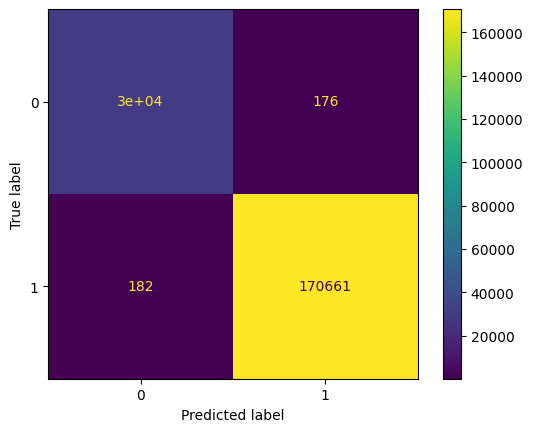

In [ ]:
cm = confusion_matrix(y_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

# ▶ Fichier PKL du modele

In [ ]:
modele = 'modele.pkl'
with open(modele, 'wb') as fichier:
    pickle.dump(random, fichier)
    print("Modèle sauvegardé avec succès dans model.pkl")



Modèle sauvegardé avec succès dans model.pkl
